In [36]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gensim import corpora, models, similarities

import warnings
warnings.filterwarnings("ignore")

In [24]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

init_notebook_mode(connected=True) #do not miss this line

In [20]:
! pwd

/Users/alexromero/Bootcamp/Breaking Hits/Scrapers


In [26]:
comments = pd.read_csv('./Instagram/IG_full.csv')
comments.columns

Index(['comment_timestamp', 'comment_id', 'comment_user_id', 'comment_text',
       'post_id', 'post_type', 'post_likes', 'post_text', 'comments(int)',
       'post_user_id', 'post_tags', 'post_timestamp', 'post_username'],
      dtype='object')

In [27]:
commentsT = data['comment_timestamp'].copy()

In [31]:
trace = go.Histogram(
    x=commentsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='IG Comment Activity Over Years',
    height=450,
    width=1000,
    xaxis=dict(
        title='Month and year'
    ),
    yaxis=dict(
        title='IG Comment Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [32]:
corpus=[]
a=[]
for i in range(len(comments['comment_text'])):
        a=comments['comment_text'][i]
        corpus.append(a)

In [35]:
corpus[0:5]

['Lets go 💯',
 'Love you ❤❤❤😍',
 'That face tho LMAO ❤❤@iamalicaldwell',
 'IM SO READY ❤️🙏🏽',
 'Gorgeous!!! That face is BEEAATT Hunnie']

In [37]:
import gensim
import logging
import tempfile

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/var/folders/9l/1z2h257j799_k5pwrmm9_km40000gn/T" will be used to save temporary dictionary and corpus.


In [38]:
from nltk.corpus import stopwords
from string import punctuation

# remove common words and tokenize
list1 = ['@','#']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

In [39]:
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'ali_ig.dict'))  # store the dictionary, for future reference
print(dictionary)

2018-09-18 19:49:19,792 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-09-18 19:49:19,919 : INFO : adding document #10000 to Dictionary(13994 unique tokens: ['go', 'lets', '💯', 'love', '❤❤❤😍']...)
2018-09-18 19:49:20,063 : INFO : adding document #20000 to Dictionary(24697 unique tokens: ['go', 'lets', '💯', 'love', '❤❤❤😍']...)
2018-09-18 19:49:20,166 : INFO : built Dictionary(33345 unique tokens: ['go', 'lets', '💯', 'love', '❤❤❤😍']...) from 29952 documents (total 193987 corpus positions)
2018-09-18 19:49:20,167 : INFO : saving Dictionary object under /var/folders/9l/1z2h257j799_k5pwrmm9_km40000gn/T/ali_ig.dict, separately None
2018-09-18 19:49:20,180 : INFO : saved /var/folders/9l/1z2h257j799_k5pwrmm9_km40000gn/T/ali_ig.dict


Dictionary(33345 unique tokens: ['go', 'lets', '💯', 'love', '❤❤❤😍']...)


In [40]:
print(dictionary.token2id)

{'go': 0, 'lets': 1, '💯': 2, 'love': 3, '❤❤❤😍': 4, 'face': 5, 'lmao': 6, 'tho': 7, '❤❤@iamalicaldwell': 8, 'im': 9, 'ready': 10, '❤️🙏🏽': 11, 'beeaatt': 12, 'gorgeous!!!': 13, 'hunnie': 14, '@cooll.guuyy': 15, 'allll': 16, 'say': 17, 'us': 18, '😭\U0001f929❤️': 19, 'hurrrry': 20, 'can’t': 21, 'wait!': 22, 'aliiii♥️♥️♥️': 23, 'c’mon': 24, 'cannot': 25, 'wait😭❤️❤️❤️❤️❤️': 26, 'excited!!!👍🏽💪🏽💯🙌🏽': 27, 'yessss😍': 28, 'ppppp': 29, 'queen': 30, 'yes': 31, '@noahbarlass': 32, 'episode....that’s': 33, 'everyone': 34, 'exposed': 35, 'got': 36, 'greatness!!!': 37, 'officially': 38, 'remember': 39, '🎶🔥🎶🔥🎶🔥': 40, 'best': 41, 'heard': 42, 'huh': 43, 'music': 44, 'new': 45, 'news': 46, 'that’s': 47, "i've": 48, 'music!!!': 49, '💕🙌': 50, 'patiently': 51, 'waiting......': 52, 'anything': 53, 'bold': 54, "can't": 55, 'choose': 56, 'cut': 57, 'every': 58, 'expressions': 59, 'facial': 60, 'fire...but': 61, 'garbage': 62, 'girl': 63, 'hair': 64, 'hear': 65, "i'm": 66, 'keeping': 67, 'man': 68, 'perform': 69

In [42]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'ali_IG.mm'), corpus)  # store to disk, for later use

2018-09-18 19:51:02,254 : INFO : storing corpus in Matrix Market format to /var/folders/9l/1z2h257j799_k5pwrmm9_km40000gn/T/ali_IG.mm
2018-09-18 19:51:02,255 : INFO : saving sparse matrix to /var/folders/9l/1z2h257j799_k5pwrmm9_km40000gn/T/ali_IG.mm
2018-09-18 19:51:02,255 : INFO : PROGRESS: saving document #0
2018-09-18 19:51:02,268 : INFO : PROGRESS: saving document #1000
2018-09-18 19:51:02,295 : INFO : PROGRESS: saving document #2000
2018-09-18 19:51:02,315 : INFO : PROGRESS: saving document #3000
2018-09-18 19:51:02,336 : INFO : PROGRESS: saving document #4000
2018-09-18 19:51:02,353 : INFO : PROGRESS: saving document #5000
2018-09-18 19:51:02,373 : INFO : PROGRESS: saving document #6000
2018-09-18 19:51:02,390 : INFO : PROGRESS: saving document #7000
2018-09-18 19:51:02,408 : INFO : PROGRESS: saving document #8000
2018-09-18 19:51:02,441 : INFO : PROGRESS: saving document #9000
2018-09-18 19:51:02,469 : INFO : PROGRESS: saving document #10000
2018-09-18 19:51:02,495 : INFO : PROG

In [43]:
from gensim import corpora, models, similarities

In [44]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

2018-09-18 19:51:37,704 : INFO : collecting document frequencies
2018-09-18 19:51:37,706 : INFO : PROGRESS: processing document #0
2018-09-18 19:51:37,722 : INFO : PROGRESS: processing document #10000
2018-09-18 19:51:37,743 : INFO : PROGRESS: processing document #20000
2018-09-18 19:51:37,760 : INFO : calculating IDF weights for 29952 documents and 33344 features (188202 matrix non-zeros)


In [45]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

## LDA

In [46]:
total_topics = 5

In [47]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

2018-09-18 19:53:42,896 : INFO : using symmetric alpha at 0.2
2018-09-18 19:53:42,898 : INFO : using symmetric eta at 0.2
2018-09-18 19:53:42,905 : INFO : using serial LDA version on this node
2018-09-18 19:53:42,927 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 29952 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2018-09-18 19:53:42,927 : INFO : PROGRESS: pass 0, at document #2000/29952
2018-09-18 19:53:43,496 : INFO : merging changes from 2000 documents into a model of 29952 documents
2018-09-18 19:53:43,524 : INFO : topic #0 (0.200): nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" + nan*"!!!❤️❤️😍" + nan*"scrolling" + nan*"💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘" + nan*"sang🙌" + nan*"yasssss❤❤❤❤you" + nan*"killllllllllled" + nan*"💥🙌🙌🙌" + nan*"girrrrrrrlllllllll!!!!!"
2018-09-18 19:53:43,525 : INFO : topic #1 (0.200): nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" 

2018-09-18 19:53:48,303 : INFO : topic #4 (0.200): nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" + nan*"!!!❤️❤️😍" + nan*"scrolling" + nan*"💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘" + nan*"sang🙌" + nan*"yasssss❤❤❤❤you" + nan*"killllllllllled" + nan*"💥🙌🙌🙌" + nan*"girrrrrrrlllllllll!!!!!"
2018-09-18 19:53:48,304 : INFO : topic diff=nan, rho=0.447214
2018-09-18 19:53:48,305 : INFO : PROGRESS: pass 0, at document #12000/29952
2018-09-18 19:53:49,486 : INFO : merging changes from 2000 documents into a model of 29952 documents
2018-09-18 19:53:49,492 : INFO : topic #0 (0.200): nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" + nan*"!!!❤️❤️😍" + nan*"scrolling" + nan*"💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘" + nan*"sang🙌" + nan*"yasssss❤❤❤❤you" + nan*"killllllllllled" + nan*"💥🙌🙌🙌" + nan*"girrrrrrrlllllllll!!!!!"
2018-09-18 19:53:49,493 : INFO : topic #1 (0.200): nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" + nan*"!!!❤️❤️😍" + nan*"scrolling" + nan*"💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘" + nan*"sang🙌" + nan*"yasssss❤❤❤❤you" + nan*"killllllllllled" + nan*"💥🙌🙌🙌" + nan*"girrrrrrrlll

2018-09-18 19:53:55,574 : INFO : topic #4 (0.200): nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" + nan*"!!!❤️❤️😍" + nan*"scrolling" + nan*"💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘" + nan*"sang🙌" + nan*"yasssss❤❤❤❤you" + nan*"killllllllllled" + nan*"💥🙌🙌🙌" + nan*"girrrrrrrlllllllll!!!!!"
2018-09-18 19:53:55,576 : INFO : topic diff=nan, rho=0.316228
2018-09-18 19:53:55,577 : INFO : PROGRESS: pass 0, at document #22000/29952
2018-09-18 19:53:56,701 : INFO : merging changes from 2000 documents into a model of 29952 documents
2018-09-18 19:53:56,707 : INFO : topic #0 (0.200): nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" + nan*"!!!❤️❤️😍" + nan*"scrolling" + nan*"💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘" + nan*"sang🙌" + nan*"yasssss❤❤❤❤you" + nan*"killllllllllled" + nan*"💥🙌🙌🙌" + nan*"girrrrrrrlllllllll!!!!!"
2018-09-18 19:53:56,708 : INFO : topic #1 (0.200): nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" + nan*"!!!❤️❤️😍" + nan*"scrolling" + nan*"💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘" + nan*"sang🙌" + nan*"yasssss❤❤❤❤you" + nan*"killllllllllled" + nan*"💥🙌🙌🙌" + nan*"girrrrrrrlll

2018-09-18 19:54:02,447 : INFO : topic #4 (0.200): nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" + nan*"!!!❤️❤️😍" + nan*"scrolling" + nan*"💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘" + nan*"sang🙌" + nan*"yasssss❤❤❤❤you" + nan*"killllllllllled" + nan*"💥🙌🙌🙌" + nan*"girrrrrrrlllllllll!!!!!"
2018-09-18 19:54:02,448 : INFO : topic diff=nan, rho=0.258199


In [67]:
#Show first n important word in the topics:
lda.show_topics()

[(0,
  'nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" + nan*"!!!❤️❤️😍" + nan*"scrolling" + nan*"💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘" + nan*"sang🙌" + nan*"yasssss❤❤❤❤you" + nan*"killllllllllled" + nan*"💥🙌🙌🙌" + nan*"girrrrrrrlllllllll!!!!!"'),
 (1,
  'nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" + nan*"!!!❤️❤️😍" + nan*"scrolling" + nan*"💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘" + nan*"sang🙌" + nan*"yasssss❤❤❤❤you" + nan*"killllllllllled" + nan*"💥🙌🙌🙌" + nan*"girrrrrrrlllllllll!!!!!"'),
 (2,
  'nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" + nan*"!!!❤️❤️😍" + nan*"scrolling" + nan*"💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘" + nan*"sang🙌" + nan*"yasssss❤❤❤❤you" + nan*"killllllllllled" + nan*"💥🙌🙌🙌" + nan*"girrrrrrrlllllllll!!!!!"'),
 (3,
  'nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" + nan*"!!!❤️❤️😍" + nan*"scrolling" + nan*"💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘" + nan*"sang🙌" + nan*"yasssss❤❤❤❤you" + nan*"killllllllllled" + nan*"💥🙌🙌🙌" + nan*"girrrrrrrlllllllll!!!!!"'),
 (4,
  'nan*"@goldenjorgeyy" + nan*"it!!!🔥🔥🔥🔥🔥" + nan*"!!!❤️❤️😍" + nan*"scrolling" + nan*"💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘" + nan*"sang🙌" + nan

In [66]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,5)) for i in range(total_topics)}
data_lda

{0: OrderedDict([('💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘', nan),
              ('scrolling', nan),
              ('sang🙌', nan),
              ('@goldenjorgeyy', nan),
              ('!!!❤️❤️😍', nan)]),
 1: OrderedDict([('💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘', nan),
              ('scrolling', nan),
              ('sang🙌', nan),
              ('@goldenjorgeyy', nan),
              ('!!!❤️❤️😍', nan)]),
 2: OrderedDict([('💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘', nan),
              ('scrolling', nan),
              ('sang🙌', nan),
              ('@goldenjorgeyy', nan),
              ('!!!❤️❤️😍', nan)]),
 3: OrderedDict([('💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘', nan),
              ('scrolling', nan),
              ('sang🙌', nan),
              ('@goldenjorgeyy', nan),
              ('!!!❤️❤️😍', nan)]),
 4: OrderedDict([('💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘', nan),
              ('scrolling', nan),
              ('sang🙌', nan),
              ('@goldenjorgeyy', nan),
              ('!!!❤️❤️😍', nan)])}

In [50]:
import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(25, 5)
(5, 25)


In [51]:
df_lda

,!!!❤️❤️😍,(except,@goldenjorgeyy,@stylishmileyc,alllllliiiiiiii,devour!!!!and,fire!!!!!,girrrrrrrlllllllll!!!!!,intense,it!!!🔥🔥🔥🔥🔥,...,scrolling,straw.,tu-night,whitney?!,yasssssssss...,yasssss❤❤❤❤you,❣️❣️❣️💜💜❣️,💥🙌🙌🙌,💯💯💯💯🙏🙏🙏🙏❤❤❤❤😘😘😘😘😘,😂☹️
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ValueError: The condensed distance matrix must contain only finite values.

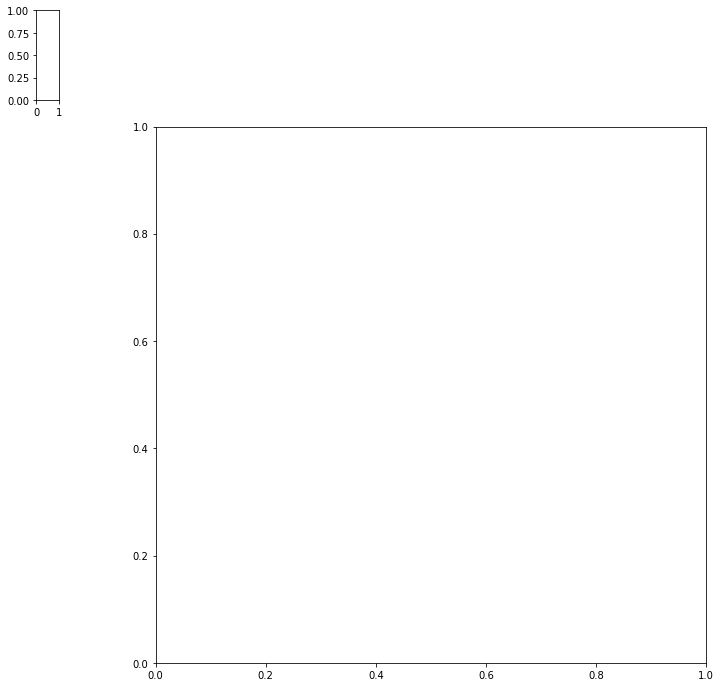

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [60]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').